Calling The Functions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

Loading The DataSet


In [ ]:
diabetes_dataset = pd.read_csv('/usr/src/2025-07-04T13-24-57.561Z-diabetes (1).csv')

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


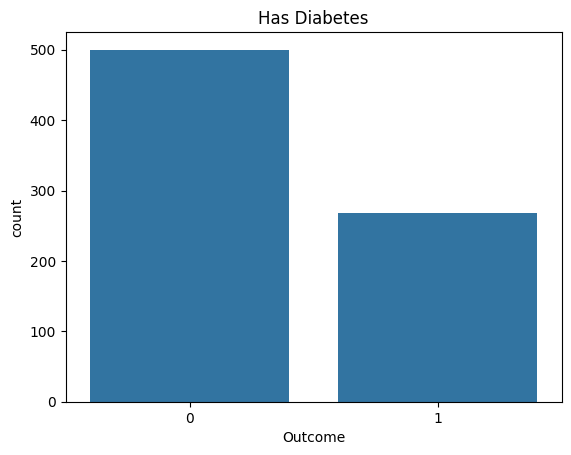

In [ ]:
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Has Diabetes')
plt.show()

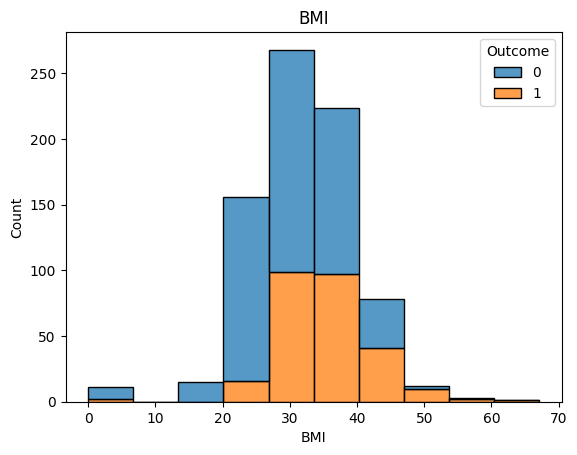

In [ ]:
sns.histplot(data=diabetes_dataset,x='BMI',hue='Outcome', multiple='stack', bins=10)
plt.title('BMI')
plt.show()

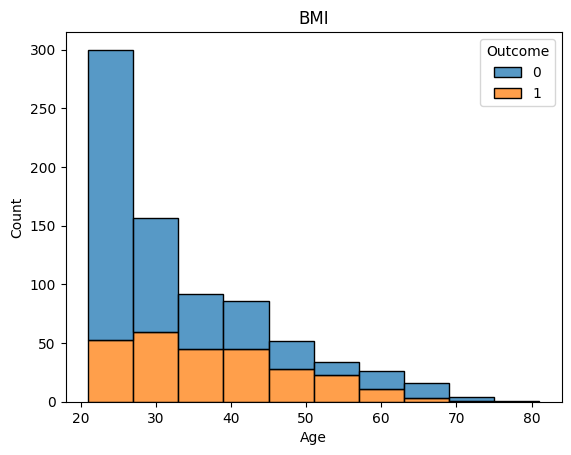

In [ ]:
sns.histplot(data=diabetes_dataset,x='Age',hue='Outcome', multiple='stack', bins=10)
plt.title('BMI')
plt.show()

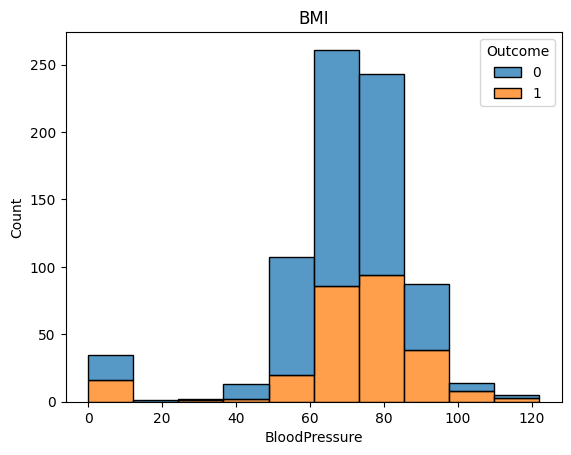

In [ ]:
sns.histplot(data=diabetes_dataset,x='BloodPressure',hue='Outcome', multiple='stack', bins=10)
plt.title('BMI')
plt.show()

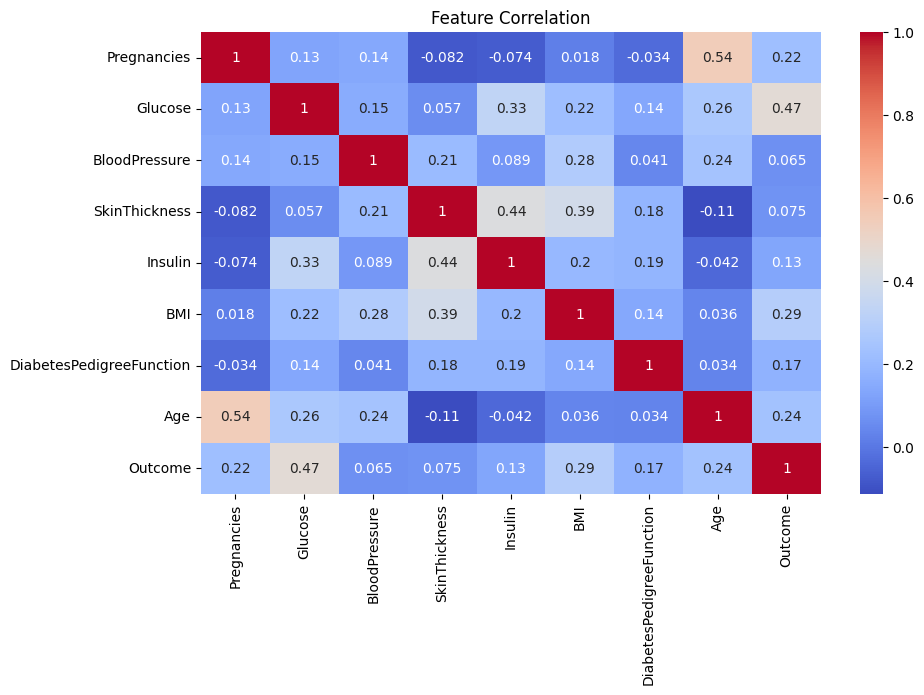

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [ ]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Traning The Data

In [ ]:
X = diabetes_dataset.drop('Outcome', axis=1)
y = diabetes_dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Scaled Training Data:")
display(X_train_scaled.head())

print("\nScaled Test Data:")
display(X_test_scaled.head())

Scaled Training Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095



Scaled Test Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101


In [ ]:
print("Training Data Shape:", X_train_scaled.shape)
print("Testing Data Shape:", X_test_scaled.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


Logistic Regression

In [ ]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



KNN

choosing the right k

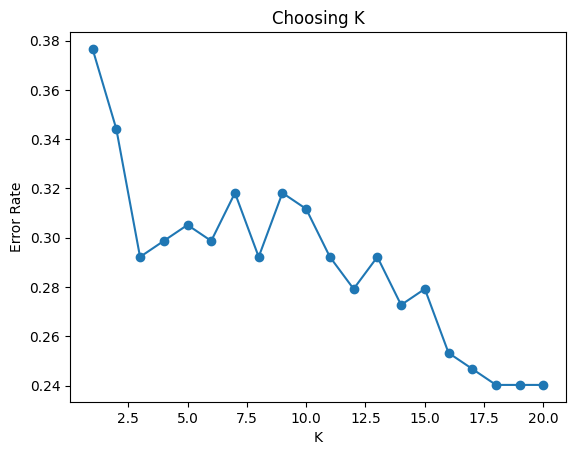

In [ ]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=18)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



Desicion Tree

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        99
           1       0.66      0.75      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154



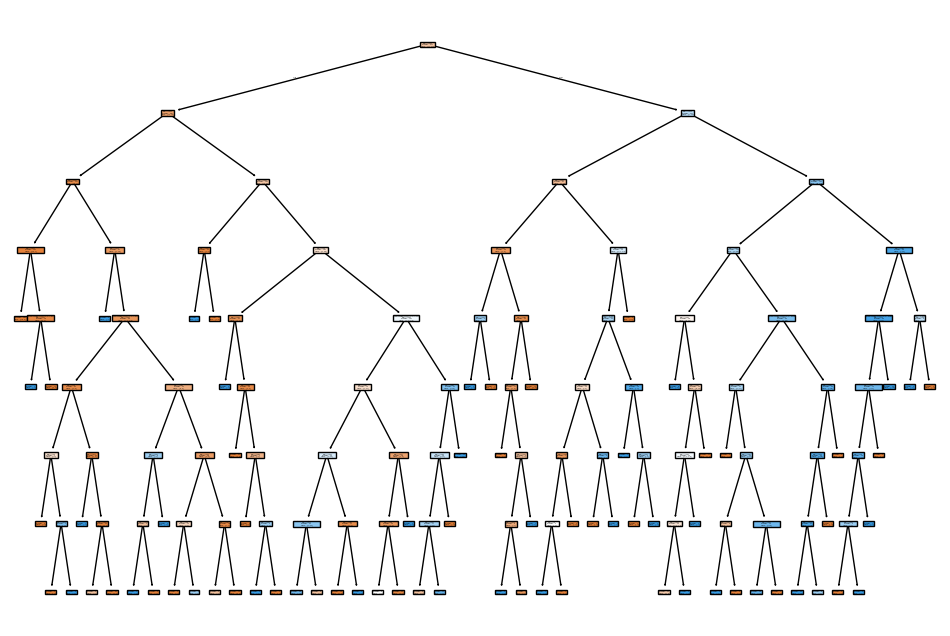

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=8)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

Random Forest

In [ ]:
model_rf = RandomForestClassifier(n_estimators=13, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



accuracy

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, pred_log),
              accuracy_score(y_test, pred_knn),
              accuracy_score(y_test, pred_tree),
              accuracy_score(y_test, pred_rf)]

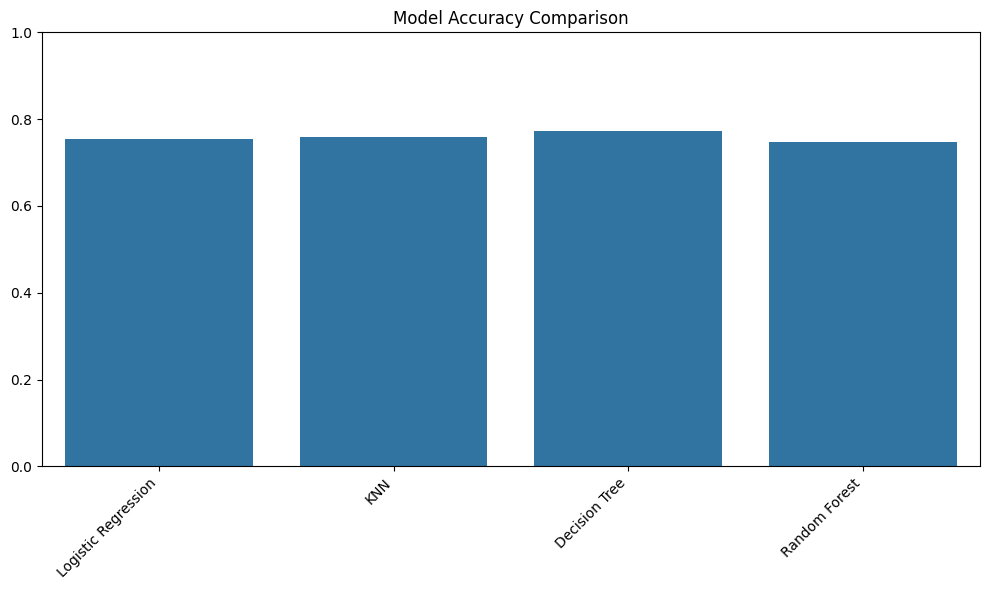

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔍 Confusion Matrix for {name}:")
    print(cm)
    print(classification_report(y_test, y_pred))
    results[name] = (model, y_pred)


🔍 Confusion Matrix for Logistic Regression:
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


🔍 Confusion Matrix for KNN:
[[70 29]
 [23 32]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154


🔍 Confusion Matrix for Random Forest:
[[78 21]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy

**Logistic Regression:**
- Balanced precision and recall for both classes
- F1 Score ~0.80 for class 0, ~0.65 for class 1
- Accuracy 75%, solid general-purpose performance
- **Good for use** when balanced performance across classes is needed, and interpretability is valued.

**KNN:**
- Lower overall performance
- Recall for class 1 is 58%, missing several positives
- F1 Score ~0.55 for class 1, accuracy 66%
- **Good for use** in scenarios where simplicity and non-linear patterns are key, but less reliable for class 1 detection.

**Random Forest:**
- Comparable to Logistic Regression
- Slightly better precision for class 0, recall for class 1 at 60%
- Accuracy 73%, good F1 Score balance
- **Good for use** when robust performance and handling complex patterns are priorities, especially for slightly better class 1 recall.

**Recommendation:** **Random Forest** is likely the best choice if prioritizing slightly better recall for class 1 and handling complex data patterns. **Logistic Regression** is a strong alternative for interpretability and balanced performance. **KNN** is less preferable due to lower performance, especially for class 1.

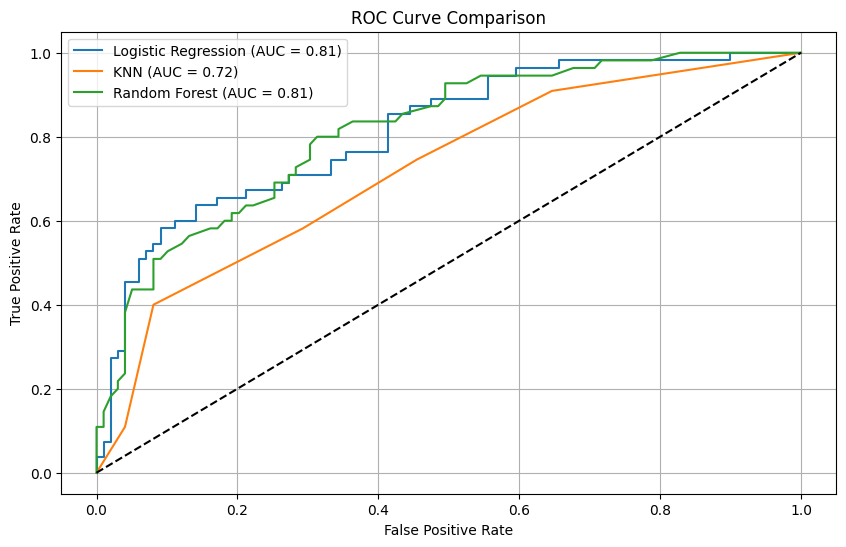

In [ ]:
plt.figure(figsize=(10, 6))
for name, (model, _) in results.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

# New Section